In [1]:
your_local_path="D:/Python/"

In [15]:
import numpy as np
from numpy import array
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


flight_data = your_local_path+'flight_data.csv'

In [16]:
flights_df = pd.read_csv(flight_data)
flights_df['origin'].value_counts() 
flights_df_dep_count = flights_df.groupby(['origin'])

#Grouping by origin and getting the no. of departures/airport
flights_df_dep_count = flights_df.groupby([flights_df.origin]).size().reset_index(name='Num_of_departures')
#changed origin as airport in order to merge departure and arrival count
flights_df_dep_count_new=flights_df_dep_count.rename(columns = {'origin':'Airport'})

In [17]:
flights_df = pd.read_csv(flight_data)
flights_df['dest'].value_counts() 
flights_df_arr_count = flights_df.groupby(['dest'])
#Grouping by destination and getting the no. of arrivals/airport
flights_df_arr_count = flights_df.groupby([flights_df.dest]).size().reset_index(name='Num_of_arrivals')
flights_df_arr_count_sorted= flights_df_arr_count.sort_values('Num_of_arrivals', ascending=False)
#changed dest as airport in order to merge departure and arrival count
flights_df_arr_count_new=flights_df_arr_count_sorted.rename(columns = {'dest':'Airport'})

In [18]:
flights_df_total = pd.merge(flights_df_dep_count_new, flights_df_arr_count_new, how='outer', on=['Airport'])
flights_tot_count=flights_df_total.fillna(0)
flights_tot_count['Tot_dep_and_arr']=flights_tot_count['Num_of_departures']+flights_tot_count['Num_of_arrivals']

In [21]:
# 1. High Volume Airports---EWR handles the highest no. of flights
flights_df_tot=flights_tot_count.sort_values('Tot_dep_and_arr', ascending=False)
flights_df_tot[0:10]


,Airport,Num_of_departures,Num_of_arrivals,Tot_dep_and_arr
0,EWR,120835.0,0.0,120835.0
1,JFK,111279.0,0.0,111279.0
2,LGA,104662.0,1.0,104663.0
3,ORD,0.0,17283.0,17283.0
4,ATL,0.0,17215.0,17215.0
5,LAX,0.0,16174.0,16174.0
6,BOS,0.0,15508.0,15508.0
7,MCO,0.0,14082.0,14082.0
8,CLT,0.0,14064.0,14064.0
9,SFO,0.0,13331.0,13331.0


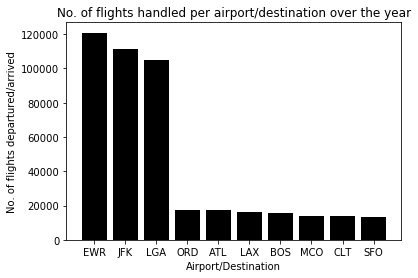

In [22]:
flights_df_total=flights_df_tot[0:10]
#Plotting No. of flights per airport/destination
##1.High Volume Airports
ind = np.arange(len(flights_df_total.Airport))
plt.bar(ind, flights_df_total.Tot_dep_and_arr, color="black")
plt.ylabel('No. of flights departured/arrived')
plt.xlabel('Airport/Destination')
plt.title('No. of flights handled per airport/destination over the year')
plt.xticks(ind, flights_df_total.Airport)
plt.show()

In [23]:
# 2. Peak Traffic Period(s), by months

flights_df = pd.read_csv(flight_data)
#Num_flights_per_month['Flights_per_month']=flights_df['month'].value_counts()
flights_df['month'].value_counts()
flights_df_grouped = flights_df.groupby([flights_df.month]).size().reset_index(name='FLights').to_string(index=False)

print (flights_df_grouped)

month  FLights
    1    27004
    2    24951
    3    28834
    4    28330
    5    28796
    6    28243
    7    29425
    8    29327
    9    27574
   10    28889
   11    27268
   12    28135


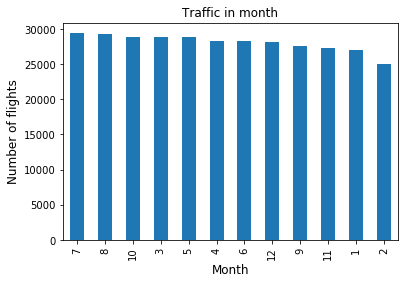

In [24]:
ax=flights_df['month'].value_counts().plot(kind='bar',title='Traffic in month')
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Number of flights", fontsize=12)
plt.show()

In [25]:
#Grouping by month and destination
flights_df_grouped=flights_df.groupby(['month','dest']).size().unstack().fillna(0).T
flights_df_grouped[0:]

month,1,2,3,4,5,6,7,8,9,10,11,12
dest,,,,,,,,,,,,
ABQ,0.0,0.0,0.0,9.0,31.0,30.0,31.0,31.0,30.0,31.0,30.0,31.0
ACK,0.0,0.0,0.0,0.0,21.0,43.0,66.0,67.0,45.0,23.0,0.0,0.0
ALB,64.0,58.0,57.0,13.0,59.0,34.0,15.0,20.0,20.0,1.0,46.0,52.0
ANC,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0
ATL,1396.0,1267.0,1448.0,1490.0,1499.0,1438.0,1511.0,1507.0,1364.0,1448.0,1384.0,1463.0
AUS,169.0,167.0,273.0,209.0,204.0,203.0,213.0,211.0,205.0,214.0,186.0,185.0
AVL,2.0,0.0,0.0,3.0,35.0,40.0,40.0,35.0,30.0,31.0,30.0,29.0
BDL,37.0,46.0,62.0,61.0,57.0,48.0,2.0,50.0,39.0,9.0,3.0,29.0
BGR,0.0,0.0,2.0,29.0,29.0,28.0,30.0,30.0,56.0,60.0,55.0,56.0


In [27]:
#Top 10 Destinations to Avoid during Peak Traffic Period(s)
 #Considered 7th,8th,10th,3rd and 5th months as peak period
flights_df_grouped['Peak_traffic_period']=flights_df_grouped[7]+flights_df_grouped[8]+flights_df_grouped[10]+flights_df_grouped[3]+flights_df_grouped[5]

In [28]:
flights_df_peak_period=flights_df_grouped.sort_values('Peak_traffic_period', ascending=False)
flights_df_peak_period[0:10]


month,1,2,3,4,5,6,7,8,9,10,11,12,Peak_traffic_period
dest,,,,,,,,,,,,,
ORD,1269.0,1197.0,1343.0,1416.0,1582.0,1547.0,1573.0,1604.0,1582.0,1604.0,1370.0,1196.0,7706.0
ATL,1396.0,1267.0,1448.0,1490.0,1499.0,1438.0,1511.0,1507.0,1364.0,1448.0,1384.0,1463.0,7413.0
LAX,1159.0,1030.0,1178.0,1382.0,1453.0,1430.0,1500.0,1505.0,1384.0,1409.0,1336.0,1408.0,7045.0
BOS,1245.0,1182.0,1324.0,1305.0,1327.0,1312.0,1378.0,1377.0,1307.0,1357.0,1235.0,1159.0,6763.0
CLT,1058.0,997.0,1156.0,1113.0,1167.0,1180.0,1260.0,1234.0,1222.0,1297.0,1187.0,1193.0,6114.0
MCO,1175.0,1110.0,1265.0,1223.0,1125.0,1160.0,1257.0,1262.0,1022.0,1113.0,1151.0,1219.0,6022.0
SFO,889.0,791.0,884.0,1116.0,1198.0,1200.0,1231.0,1266.0,1196.0,1220.0,1161.0,1179.0,5799.0
MIA,981.0,902.0,1017.0,971.0,991.0,954.0,978.0,975.0,912.0,971.0,972.0,1104.0,4932.0
FLL,1161.0,1073.0,1238.0,1112.0,919.0,901.0,938.0,939.0,807.0,895.0,964.0,1108.0,4929.0


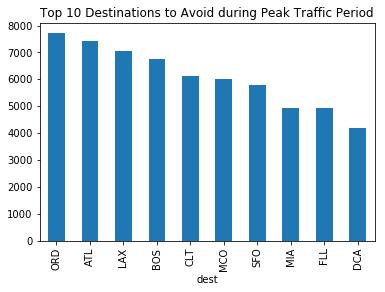

In [29]:
flights_df_peak_period_plot=flights_df_peak_period[0:10]
#2.Top 10 Destinations to Avoid during Peak Traffic Period(s)
flights_df_peak_period_plot['Peak_traffic_period'].plot(kind='bar', title='Top 10 Destinations to Avoid during Peak Traffic Period')

In [30]:
#Top 10 Un-explored Destinations Peak Traffic Period(s)
flights_df_peak_period[-10:]

month,1,2,3,4,5,6,7,8,9,10,11,12,Peak_traffic_period
dest,,,,,,,,,,,,,
MYR,31.0,14.0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0
ANC,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,8.0
MTJ,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
PSP,4.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
JAC,2.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0
HDN,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
EYW,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0
SBN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,2.0,1.0,2.0
LGA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


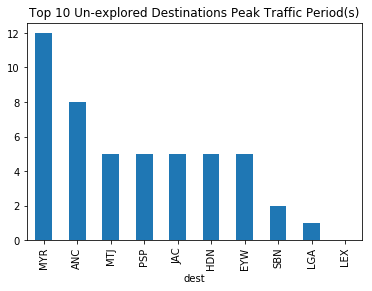

In [31]:
flights_df_peak_period_plot=flights_df_peak_period[-10:]
#Top 10 Un-explored Destinations Peak Traffic Period(s)
flights_df_peak_period_plot['Peak_traffic_period'].plot(kind='bar', title='Top 10 Un-explored Destinations Peak Traffic Period(s)')